<a href="https://colab.research.google.com/github/rifkihanafi421-hub/Project-Data-Science/blob/main/Fraud_Detection_on_Financial_Transactions_Using_Isolation_Forest_and_Local_Outlier_Factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fraud transaksi adalah salah satu masalah terbesar dalam industri fintech. Pada project ini, saya membangun model unsupervised anomaly detection untuk mengidentifikasi aktivitas transaksi yang berpotensi fraud tanpa memerlukan label fraud sebelumnya.


Metode / Algoritma
1. Isolation Forest

Mengisolasi outlier dengan membuat partisi random pada data

Outlier lebih cepat terisolasi karena datanya “aneh”

2. Local Outlier Factor

Mengukur kepadatan lokal

Semakin rendah kepadatan suatu titik dibanding tetangganya → semakin besar kemungkinan fraud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


In [2]:
df = pd.read_csv("synthetic_ecommerce_sales_2025 (1).csv")
df.head()

,order_id,customer_id,product_category,product_price,quantity,order_date,region,payment_method,delivery_days,is_returned,customer_rating,discount_percent,revenue
0,1,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Beauty,190.40,5,2023-02-21,Europe,BankTransfer,8,0,3.8,0,952.00
1,2,23b8c1e9-3924-46de-beb1-3b9046685257,Fashion,82.22,3,2023-10-13,North America,CreditCard,5,0,3.8,0,246.66
2,3,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Beauty,15.19,2,2023-06-28,Oceania,Cash,6,1,2.0,10,27.34
3,4,972a8469-1641-4f82-8b9d-2434e465e150,Electronics,310.65,2,2023-07-11,Europe,PayPal,9,0,2.9,5,590.23
4,5,17fc695a-07a0-4a6e-8822-e8f36c031199,Fashion,74.05,4,2023-02-24,Africa,PayPal,3,1,3.1,20,236.96


#preprocessing

In [3]:
df = df.drop_duplicates()

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

#Feature Selection

In [4]:
features = df[numeric_cols]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
iso = IsolationForest(
    n_estimators=150,
    contamination=0.02,
    random_state=42
)
iso_pred = iso.fit_predict(scaled_features)

df["iso_anomaly"] = iso_pred
df["iso_anomaly"] = df["iso_anomaly"].map({1: 0, -1: 1})


In [7]:
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.02
)

lof_pred = lof.fit_predict(scaled_features)
df["lof_anomaly"] = np.where(lof_pred == -1, 1, 0)

#perbandingan model

In [8]:
print("Anomali Isolation Forest :", df["iso_anomaly"].sum())
print("Anomali LOF             :", df["lof_anomaly"].sum())

Anomali Isolation Forest : 2000
Anomali LOF             : 2000


#Tampilkan Transaksi yang Dicurigai Fraud

In [9]:
fraud_cases = df[(df["iso_anomaly"] == 1) | (df["lof_anomaly"] == 1)]
fraud_cases.head(10)


,order_id,customer_id,product_category,product_price,quantity,order_date,region,payment_method,delivery_days,is_returned,customer_rating,discount_percent,revenue,iso_anomaly,lof_anomaly
2,3,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Beauty,15.190,2,2023-06-28,Oceania,Cash,6,1,2.0,10,27.34,1,0
4,5,17fc695a-07a0-4a6e-8822-e8f36c031199,Fashion,74.050,4,2023-02-24,Africa,PayPal,3,1,3.1,20,236.96,1,0
25,26,ab9099a4-35a2-40ae-9af3-05535ec42e08,Beauty,349.670,3,2023-10-20,South America,BankTransfer,1,0,5.0,0,1049.01,0,1
41,42,956269f0-e5d7-4875-adad-d6c795a76d79,Beauty,253.810,4,2023-05-22,South America,PayPal,1,0,2.6,5,964.48,0,1
60,61,f4188f3f-8a14-4e62-a95b-4715c333e861,Sports,489.860,5,2023-06-04,North America,Cash,5,0,3.4,0,2449.30,0,1
84,85,b92da22b-21df-406f-8a0b-3c3336d8393a,Fashion,459.960,4,2023-08-25,Asia,CreditCard,4,0,2.2,5,1747.85,0,1
94,95,23e2fcb4-72d8-467d-894a-05e430b187ef,Fashion,499.860,3,2024-09-23,Europe,BankTransfer,5,0,4.2,5,1424.60,0,1
95,96,766ecb15-474e-4c19-aef9-12766c006f61,Automotive,192.040,5,2025-01-02,Europe,PayPal,1,0,4.9,0,960.20,0,1
99,100,03c72ba8-d605-4770-8a63-f881ffd0f9d5,Electronics,191.853,6,2024-11-11,North America,Cash,2,0,4.4,5,1093.56,0,1
103,104,2a25a888-0f02-4ad0-a706-7ef466aa9385,Fashion,421.840,1,2024-12-17,South America,BankTransfer,8,0,2.1,0,421.84,0,1


#visualisasi anomali

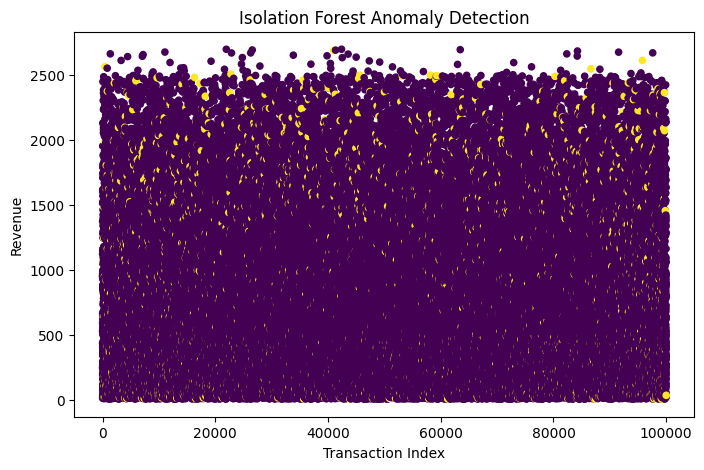

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(df.index, df["revenue"],
            c=df["iso_anomaly"], s=20)
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Transaction Index")
plt.ylabel("Revenue")
plt.show()